## pCMV-Target-AIDmax construction
1. A nCas9-encoding fragment was amplified from pCMV-BE4max(Addgene 112093) using the primer set SI1308/SI1305.
2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer set SI1304/SI1307.
3. A backbone fragment was amplified from pCMV-ABEmax(Addgene 112095)using the primer set SI1310/SI1309.
4. The three fragments were assembled by Gibson Assembly reaction.

In [1]:
%matplotlib inline

In [2]:
import sys 
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
QUEEN(record="https://benchling.com/s/seq-TWeI3GfYr2zJr5z87Rjq", dbtype="benchling", product="pCMV_BE4max")
QUEEN(record="https://benchling.com/s/seq-OCkN5m6U6st0I9ToyOn1", dbtype="benchling", product="pCMV_ABEmax")
QUEEN(record="https://benchling.com/s/seq-APwTvCrCHnd38ugWloNK", dbtype="benchling", product="opt_CDA1_ugi")

<queen.QUEEN object; project='opt_CDA1_ugi', length='3874 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "1. A nCas9-encoding fragment was amplified from pCMV-BE4max(Addgene 112093) using the primer set SI1308/SI1305."
QUEEN(seq="ACCAAAGAAGAAGCGGAAAGTCGACAAGAAGTACAGCATCGGCCT", product="SI1308")
QUEEN(seq="GTCACCTCCCAGCTGAGACAGGTCG", product="SI1305")
pCMV_BE4max.searchsequence(SI1308.seq[-18:], product="FW6", pn=processname1, pd=description1)
pCMV_BE4max.searchsequence(SI1305.seq[-18:], product="RV6", pn=processname1, pd=description1)
cropdna(pCMV_BE4max, FW6[0].end, RV6[0].start,  product="extract6", pn=processname1, pd=description1)
modifyends(extract6, SI1308.seq, SI1305.rcseq, product="fragment6", pn=processname1, pd=description1)

<queen.QUEEN object; project='fragment6', length='4123 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer set SI1304/SI1307."
QUEEN(seq="CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG", product="SI1304")
QUEEN(seq="TCAGCGGGTTTAAACTCATTATCACAGCATTTTGATTTTGTTCTC", product="SI1307")
opt_CDA1_ugi.searchsequence(SI1304.seq[-18:], product="FW7", pn=processname2, pd=description2)
opt_CDA1_ugi.searchsequence(SI1307.seq[-18:], product="RV7", pn=processname2, pd=description2)
cropdna(opt_CDA1_ugi, FW7[0].end, RV7[0].start, product="extract7", pn=processname2, pd=description2)
modifyends(extract7, SI1304.seq, SI1307.rcseq, product="fragment7", pn=processname2, pd=description2)

<queen.QUEEN object; project='fragment7', length='1231 bp', topology='linear'>

In [6]:
processname3 = "PCR"
description3 = "3. The backbone fragment (fragment8) was amplified from pCMV-ABEmax using SI1310/SI1309."
QUEEN(seq="TGATAATGAGTTTAAACCCGCTGA", product="SI1310")
QUEEN(seq="GACTTTCCGCTTCTTCTTTGGTGACTCG", product="SI1309")
pCMV_ABEmax.searchsequence(SI1310.seq[-18:], product="FW8", pn=processname3, pd=description3)
pCMV_ABEmax.searchsequence(SI1309.seq[-18:], product="RV8", pn=processname3, pd=description3)
cropdna(pCMV_ABEmax, FW8[0].end, RV8[0].start,  product="extract8", pn=processname3, pd=description3)
modifyends(extract8, SI1310.seq, SI1309.rcseq, product="fragment8", pn=processname3, pd=description3)

<queen.QUEEN object; project='fragment8', length='3439 bp', topology='linear'>

In [7]:
processname4 = "Gibson Assembly"
description4 = "4. The three fragments were assembled by Gibson Assembly reaction."
modifyends(fragment6, "*{22}/-{22}", "-{22}/*{22}", product="fragment6_mod", pn=processname4, pd=description4) 
modifyends(fragment7, "*{22}/-{22}", "-{24}/*{24}", product="fragment7_mod", pn=processname4, pd=description4) 
modifyends(fragment8, "*{24}/-{24}", "-{22}/*{22}", product="fragment8_mod", pn=processname4, pd=description4) 
joindna(fragment6_mod, fragment7_mod, fragment8_mod, topology="circular", product="pCMV_Target_AIDmax", pn=processname4, pd=description4)

<queen.QUEEN object; project='pCMV_Target_AIDmax', length='8725 bp', topology='circular'>

In [8]:
pCMV_Target_AIDmax.printfeature()

feature_id  feature_type  qualifier:label         start  end   strand  
1           source        source                  0      4053  +       
100         misc_feature  GS_2x GS linker         4078   4108  +       
200         misc_feature  GenScript J9270EH080-1  4078   5266  +       
300         source        source                  4101   5242  +       
400         misc_feature  GS_Mutated SH3 domain   4108   4279  +       
500         misc_feature  SG_3x FLAG              4279   4357  +       
600         CDS           GS_PmCDA1               4357   4984  +       
700         CDS           SV40 NLS                4984   5005  +       
800         CDS           GS_UGI                  5011   5263  +       
900         source        source                  5287   8237  +       
1000        primer_bind   BGH-rev                 5291   5309  -       
1100        polyA_signal  bGH poly(A) signal      5297   5522  +       
1200        primer_bind   M13 Reverse             5592   5609  -

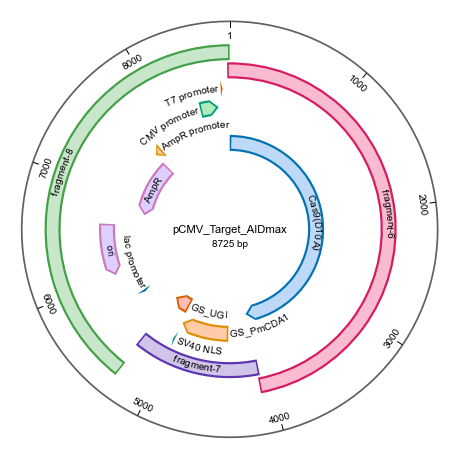

In [9]:
#Visuailze annotated sequence map
list600  = ["#E53935","#D81B60","#8E24AA","#5E35B1","#3949AB","#1E88E5","#039BE5","#00ACC1","#00897B","#43A047","#7CB342","#C0CA33","#FDD835","#FFB300","#FB8C00","#F4511E","#6D4C41","#546E7A"]
list100  = ["#ffcdd2","#f8bbd0","#e1bee7","#d1c4e9","#c5cae9","#bbdefb","#b3e5fc","#b2ebf2","#b2dfdb","#c8e6c9","#dcedc8","#f0f4c3","#fff9c4","#ffecb3","#ffe0b2","#ffccbc","#d7ccc8","#cfd8dc"]
color_sets = list(zip(list600,list100))
color_sets = [color_sets[0], color_sets[2], color_sets[4], color_sets[5], color_sets[7], color_sets[1], color_sets[3], color_sets[9], color_sets[10], color_sets[12], color_sets[14], color_sets[16], color_sets[11], color_sets[17]]

def add_fragment_annotation(dna, fragment, fragment_id, color_set):
    f = dna.searchsequence(fragment.seq)
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute("f{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:label", operation=createattribute("fragment-{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="strand", operation=replaceattribute(0), new_copy=False)

def visualization(dna):
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")
    plasmid = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular") 
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+")
    for i in range(len(fragments)):
        fragments[i].location.strand = 0
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments
    fig       = visualizemap(plasmid, feature_list=features, map_view="circular", tick_space=1000, title=dna.project)
    return fig

add_fragment_annotation(pCMV_Target_AIDmax, fragment6, "6", color_sets[5])
add_fragment_annotation(pCMV_Target_AIDmax, fragment7, "7", color_sets[6])
add_fragment_annotation(pCMV_Target_AIDmax, fragment8, "8", color_sets[7])
fig = visualization(pCMV_Target_AIDmax)

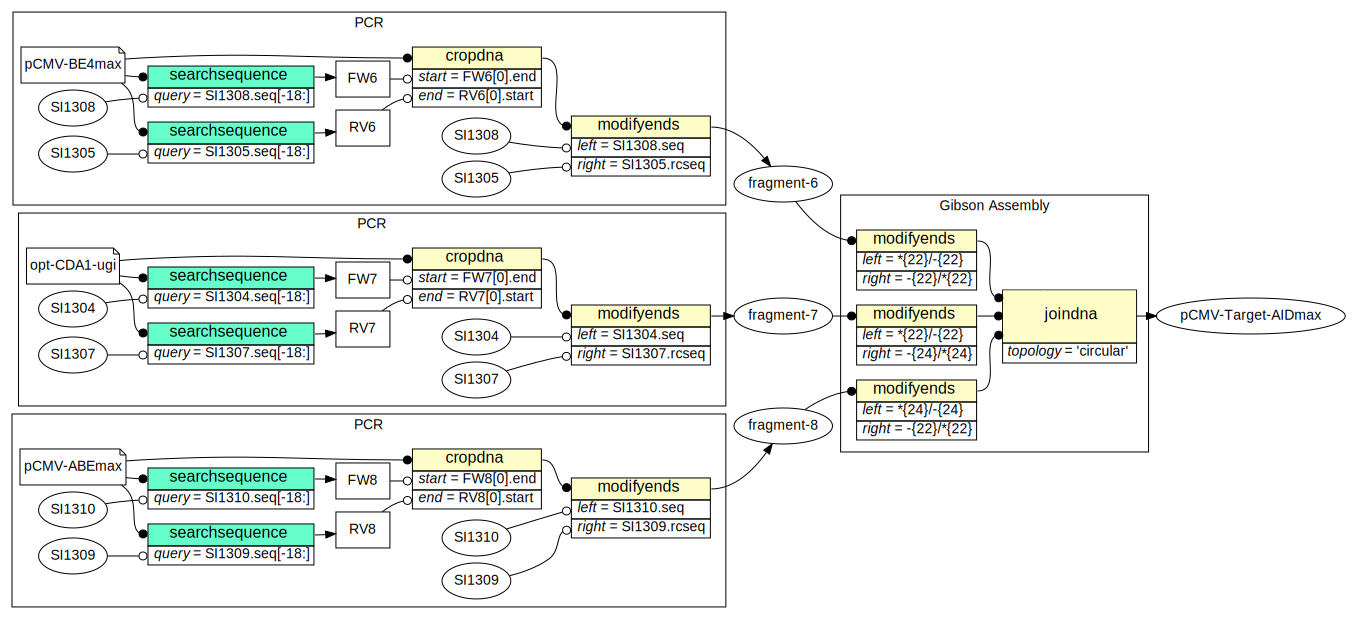

In [10]:
flow = visualizeflow(pCMV_Target_AIDmax, alias_dict = {"fragment7":"fragment-7", "fragment8":"fragment-8", "fragment6":"fragment-6", "pCMV_ABEmax":"pCMV-ABEmax", "pCMV_BE4max":"pCMV-BE4max", "opt_CDA1_ugi":"opt-CDA1-ugi", "pCMV_Target_AIDmax":"pCMV-Target-AIDmax"})
flow.render("output/pCMV_Target_AIDmax_construction")
flow

In [11]:
pCMV_Target_AIDmax.outputgbk("output/pCMV-Target-AIDmax.gbk")

In [12]:
quine(pCMV_Target_AIDmax, execution=True, output="output/pCMV_Target_AIDmax_construction")

The quine code correctly reconstructed the given QUEEN object.


In [13]:
quine(pCMV_Target_AIDmax, description_only=True)

1. A nCas9-encoding fragment was amplified from pCMV-BE4max(Addgene 112093) using the primer set SI1308/SI1305.
2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer set SI1304/SI1307.
3. The backbone fragment (fragment8) was amplified from pCMV-ABEmax using SI1310/SI1309.
4. The three fragments were assembled by Gibson Assembly reaction.
